## Data processing

In [2]:
import pandas as pd
cafe_reviews = pd.read_parquet("cafe_reviews.parquet")

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.casual import TweetTokenizer
import string
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize, sent_tokenize, WhitespaceTokenizer, RegexpTokenizer
from nltk.corpus import words
from nltk.tokenize import SyllableTokenizer

# download package
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('words')

# upload stopwords and string
punctuations = set(string.punctuation)
english_words = set(words.words())

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package words to /home/jupyter/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
cafe_reviews.head()

,review_id,business_id,user_id,stars,text,date,name,review_count,yelping_since,cafe_review
11,l3Wk_mvAog6XANIuGQ9C7Q,EQ-TZ2eeD_E0BHuvoaeG5Q,ZbqSHbgCjzVAqaa7NKWn5A,4,"Locals recommended Milktooth, and it's an amaz...",2015-08-19 14:31:45,Small,18.0,2015-08-15 13:28:06,True
19,Xs8Z8lmKkosqW5mw_sVAoA,eFvzHawVJofxSnD7TgbZtg,IQsF3Rc6IgCzjVV9DE8KXg,5,My absolute favorite cafe in the city. Their b...,2014-11-12 15:30:27,Dana,182.0,2010-02-22 16:15:28,True
43,qGQvUHmC02PAZW3H1WTIfw,eaJCpC6IhYphj7bwCDHTwQ,RRTQpg8hutdimzAYuP_Hbw,5,Stopped by after a Sunday morning walk in the ...,2015-08-30 13:41:47,Daphne,11.0,2015-04-11 12:38:01,True
127,940tqxFO4Pwg_KMg4Y4Z5g,EQ-TZ2eeD_E0BHuvoaeG5Q,O6wkgoJqU7KMjleSlCDGaA,5,Milktooth is the place to go if you want a goo...,2018-01-10 01:48:58,Lauren,142.0,2014-07-11 02:28:10,True
243,uwPhE21CZLlp1kkSMPvvYw,WKMJwqnfZKsAae75RMP6jA,5OnQqP3q2_9auNdDKpLdsw,3,So much to like about this place--the beautifu...,2012-11-06 23:35:15,Toquester,24.0,2010-03-10 02:19:34,True


In [5]:
cafe_reviews.drop(columns=["review_id", "business_id", "user_id", "date", "name", "review_count", "yelping_since", "cafe_review"], inplace=True)
cafe_reviews.head()

,stars,text
11,4,"Locals recommended Milktooth, and it's an amaz..."
19,5,My absolute favorite cafe in the city. Their b...
43,5,Stopped by after a Sunday morning walk in the ...
127,5,Milktooth is the place to go if you want a goo...
243,3,So much to like about this place--the beautifu...


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cafe_reviews["text"], cafe_reviews["stars"], test_size=0.2, random_state=42)

## Text Cleaner

In [7]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import word_tokenize, TreebankWordDetokenizer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def cleanup_text(sentence):
  # First, word tokenize.
  tokenized_sms_messages = word_tokenize(sentence)

  # Lower case
  tokenized_sms_messages = [word.lower() for word in tokenized_sms_messages]

  # Remove punctuation
  tokenized_sms_messages = [word for word in tokenized_sms_messages if word not in string.punctuation]

  # stem
  # tokenized_sms_messages = [ps.stem(word) for word in tokenized_sms_messages]
    
  # Remove stop words
  tokenized_sms_messages = [word for word in tokenized_sms_messages if word not in stop_words]

  # put it back together
  tokenized_sms_messages = TreebankWordDetokenizer().detokenize(tokenized_sms_messages)

  return tokenized_sms_messages

## NLP Model--TextBlob to directly tell the sentiment

Using a pre-trained machine learning model TextBlob, a pre-trained NLP model that provides sentiment polarity scores to classify reviews as positive, negative, or neutral for our current review dataset. This model is based on Naïve Bayes classification and a lexicon-based approach, allowing it to assign sentiment scores without requiring additional labeled data.

In [9]:
cafe_reviews["cleaned_text"] = cafe_reviews["text"].apply(cleanup_text)

In [10]:
cafe_reviews.head()

,stars,text,cleaned_text
11,4,"Locals recommended Milktooth, and it's an amaz...",locals recommended milktooth's amazing jewel i...
19,5,My absolute favorite cafe in the city. Their b...,absolute favorite cafe city black white latte ...
43,5,Stopped by after a Sunday morning walk in the ...,stopped sunday morning walk park great food co...
127,5,Milktooth is the place to go if you want a goo...,milktooth place go want good breakfast cocktai...
243,3,So much to like about this place--the beautifu...,much like place--beautiful mercer building loc...


### Apply TextBlob Sentiment Analysis

In [11]:
!pip install textblob

In [12]:
from textblob import TextBlob

cafe_reviews["sentiment"] = cafe_reviews["cleaned_text"].apply(lambda review: TextBlob(review).sentiment.polarity)
cafe_reviews['Sentiment_Category'] = cafe_reviews["sentiment"].apply(
    lambda polarity: 'Positive' if polarity > 0.1 else ('Negative' if polarity < 0.05 else 'Neutral'))

In [13]:
cafe_reviews.head()

,stars,text,cleaned_text,sentiment,Sentiment_Category
11,4,"Locals recommended Milktooth, and it's an amaz...",locals recommended milktooth's amazing jewel i...,0.600000,Positive
19,5,My absolute favorite cafe in the city. Their b...,absolute favorite cafe city black white latte ...,0.434921,Positive
43,5,Stopped by after a Sunday morning walk in the ...,stopped sunday morning walk park great food co...,0.650000,Positive
127,5,Milktooth is the place to go if you want a goo...,milktooth place go want good breakfast cocktai...,0.242103,Positive
243,3,So much to like about this place--the beautifu...,much like place--beautiful mercer building loc...,0.145833,Positive


Based on the analysis, we can tell the sentiment is positive/negative of each review.

/var/tmp/ipykernel_21223/1232317157.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Sentiment")


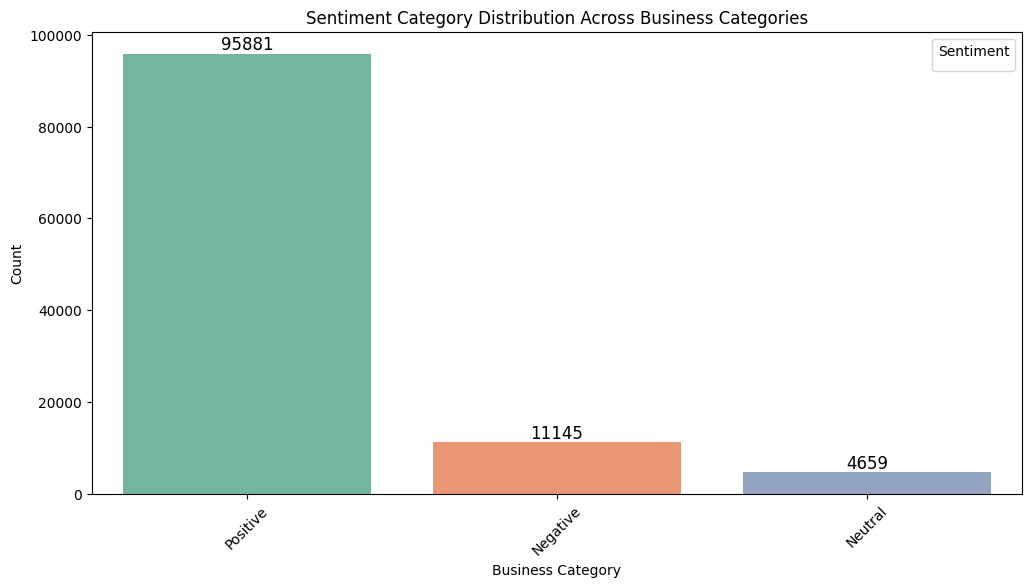

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=cafe_reviews, x="Sentiment_Category", hue="Sentiment_Category", palette="Set2")

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=45)
plt.xlabel("Business Category")
plt.ylabel("Count")
plt.title("Sentiment Category Distribution Across Business Categories")
plt.legend(title="Sentiment")

plt.show()



We can observe that most of the reviews have strong sentiments positive and negative, what's more positive reviews is dominant in this dataset.

### Analyze the negative reviews based on Frequency

In [14]:
df_negative = cafe_reviews.copy()
df_negative = df_negative[df_negative['Sentiment_Category']=='Negative']
df_negative.drop(columns=["text","sentiment"], inplace=True)
df_negative.head()

,stars,cleaned_text,Sentiment_Category
456,2,going several times going fresh sad report las...,Negative
647,1,hubby eager try establishment due rave review ...,Negative
1227,3,cheap food large selection unfortunately forgo...,Negative
1651,1,awful business model took forever even figure ...,Negative
1711,4,dayum good burger juicy glistening melting che...,Negative


In [23]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
cv.fit(df_negative["cleaned_text"])
word_counts = cv.vocabulary_
top_words = list(word_counts.items())[:10]
top_words

[('going', 9537),
 ('several', 18982),
 ('times', 21679),
 ('fresh', 8945),
 ('sad', 18351),
 ('report', 17718),
 ('last', 12197),
 ('visit', 23149),
 ('par', 15423),
 ('went', 23527)]

We can see that most of the negative reviews complain about the time, freshness.

### Check contradictory revews

In [27]:
cafe_reviews["is_contradictory"] = (
    ((cafe_reviews["stars"] < 3) & (cafe_reviews["Sentiment_Category"] == "Positive")) |
    ((cafe_reviews["stars"] > 3) & (cafe_reviews["Sentiment_Category"] == "Negative"))
).astype(int)

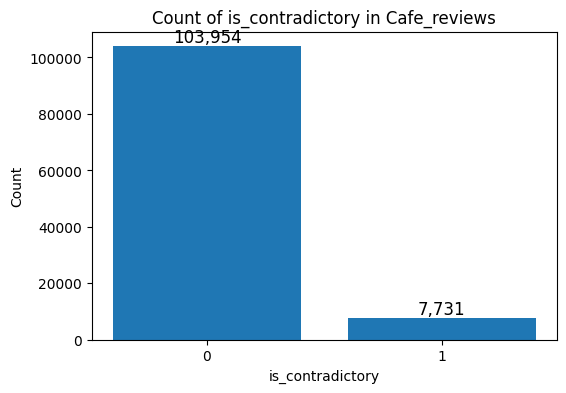

In [28]:
import matplotlib.pyplot as plt

count_data = cafe_reviews["is_contradictory"].value_counts()
plt.figure(figsize=(6, 4))
bars = plt.bar(count_data.index.astype(str), count_data.values)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             f'{bar.get_height():,}', ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel("is_contradictory")
plt.ylabel("Count")
plt.title("Count of is_contradictory in Cafe_reviews")
plt.show()

We found out that there are many reviews is contradictory:

01 Sentiment_Category = Positive but Stars < 3

02 Sentiment_Category = Negative but Stars > 3

## Training Sentiment Analysis Model for future analysis

### Clean up the contradictory comments (low stars but positive/high stars but negative)

In order to make sure that our dataset is clean and each review is valid, we cleaned up those Conflicting reviews and comments, for example, the sentiment_category is positive but got the stars that are less than 3.

In [31]:
df_valid_review = cafe_reviews.copy()
df_valid_review.drop(columns=["text"], inplace=True)
df_valid_review.head()

,stars,cleaned_text,sentiment,Sentiment_Category,is_contradictory
11,4,locals recommended milktooth's amazing jewel i...,0.600000,Positive,0
19,5,absolute favorite cafe city black white latte ...,0.434921,Positive,0
43,5,stopped sunday morning walk park great food co...,0.650000,Positive,0
127,5,milktooth place go want good breakfast cocktai...,0.242103,Positive,0
243,3,much like place--beautiful mercer building loc...,0.145833,Positive,0


In [32]:
df_valid_review["Sentiment_Category"] = df_valid_review["Sentiment_Category"].astype(str)

df_valid_review = df_valid_review[~(
    ((df_valid_review["Sentiment_Category"] == "Positive") & (df_valid_review["stars"] < 3)) |
    ((df_valid_review["Sentiment_Category"] == "Negative") & (df_valid_review["stars"] > 3))
)]
df_valid_review.head()

,stars,cleaned_text,sentiment,Sentiment_Category,is_contradictory
11,4,locals recommended milktooth's amazing jewel i...,0.600000,Positive,0
19,5,absolute favorite cafe city black white latte ...,0.434921,Positive,0
43,5,stopped sunday morning walk park great food co...,0.650000,Positive,0
127,5,milktooth place go want good breakfast cocktai...,0.242103,Positive,0
243,3,much like place--beautiful mercer building loc...,0.145833,Positive,0


After clean the dataset, we can start to train our model.

### Train KNN model

In [34]:
df_valid_review.head()

,stars,cleaned_text,sentiment,Sentiment_Category,is_contradictory
11,4,locals recommended milktooth's amazing jewel i...,0.600000,Positive,0
19,5,absolute favorite cafe city black white latte ...,0.434921,Positive,0
43,5,stopped sunday morning walk park great food co...,0.650000,Positive,0
127,5,milktooth place go want good breakfast cocktai...,0.242103,Positive,0
243,3,much like place--beautiful mercer building loc...,0.145833,Positive,0


In [35]:
df_valid_review = df_valid_review.drop(['sentiment', 'Sentiment_Category'], axis=1)
df_valid_review.head(1)

,stars,cleaned_text,is_contradictory
11,4,locals recommended milktooth's amazing jewel i...,0


In [36]:
df_valid_review["sentiment"] = df_valid_review["stars"].apply(lambda x: "positive" if x >=3 else "negative") # different criteria may apply here

In [37]:
import gensim.downloader as api

# Load the pretrained model
pretrained_model = api.load('glove-wiki-gigaword-50')

import numpy as np

vector_size = pretrained_model.vector_size  # Get the embedding size

tokenized_reviews = df_valid_review["cleaned_text"]

embeddings = list(map(lambda tokenized_review: pretrained_model.get_mean_vector(tokenized_review) if len(tokenized_review) > 0 else np.zeros(vector_size), tokenized_reviews))
     

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import pandas as pd

X= df_valid_review["cleaned_text"]
y= df_valid_review["sentiment"]
def assess_model(df, X, y_column):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
  # train the model
  classifier = KNeighborsClassifier()
  classifier.fit(X_train, y_train)

  # Predict on the test data
  y_pred = classifier.predict(X_test)

  # Evaluate the model
  accuracy = accuracy_score(y_test, y_pred)
  f1_score = sklearn.metrics.f1_score(y_test, y_pred, pos_label="positive")
  print(f"Accuracy: {accuracy}")
  print(f"f1_score: {f1_score}")
  print(sklearn.metrics.classification_report(y_test,y_pred))
  display(pd.DataFrame(confusion_matrix(y_test, y_pred, normalize='true'), columns=classifier.classes_, index=classifier.classes_ ))


In [39]:
assess_model(cafe_reviews, embeddings, "sentiment")

Accuracy: 0.9090471838776394
f1_score: 0.9521689642089288
              precision    recall  f1-score   support

    negative       0.31      0.04      0.08      1793
    positive       0.92      0.99      0.95     18998

    accuracy                           0.91     20791
   macro avg       0.61      0.52      0.51     20791
weighted avg       0.86      0.91      0.88     20791



,negative,positive
negative,0.043503,0.956497
positive,0.009264,0.990736


It seems that the model focus more on the positive reviews.

01 Because the training data is imbalanced, the model may be more inclined to predict reviews as positive. The number of samples of negative comments (negative) is much smaller than that of positive comments (11145 vs. 95881)

02 

### Try to adjust the threshold and use LogisticRegression to focus more on the negative reviews and improve the model ability

In [46]:
import gensim.downloader as api
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

Accuracy: 0.8559
f1_score: 0.9192
              precision    recall  f1-score   support

    negative       0.28      0.42      0.34      1793
    positive       0.94      0.90      0.92     18998

    accuracy                           0.86     20791
   macro avg       0.61      0.66      0.63     20791
weighted avg       0.89      0.86      0.87     20791



,negative,positive
negative,757,1036
positive,1961,17037


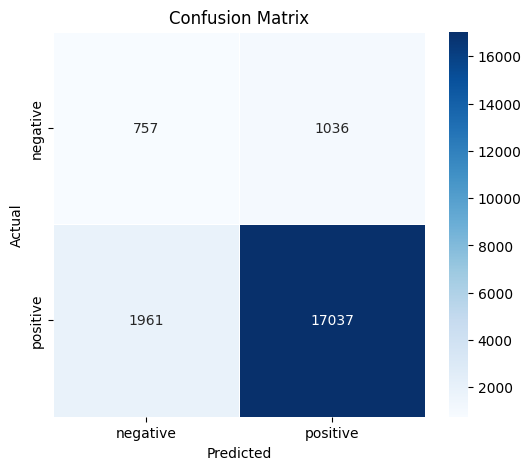

In [47]:
pretrained_model = api.load('glove-wiki-gigaword-50')
vector_size = pretrained_model.vector_size 

df_valid_review["sentiment"] = df_valid_review["stars"].apply(lambda x: "positive" if x >= 3 else "negative")

tokenized_reviews = df_valid_review["cleaned_text"]
def get_embedding(tokenized_review):
    return pretrained_model.get_mean_vector(tokenized_review) if len(tokenized_review) > 0 else np.zeros(vector_size)

embeddings = np.array(list(map(get_embedding, tokenized_reviews)))

# adjust threshold=0.4
def assess_model(df, X, y_column, threshold=0.4):
    y = df[y_column] 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    classifier = LogisticRegression(class_weight="balanced", random_state=42)
    classifier.fit(X_train, y_train)

    y_probs = classifier.predict_proba(X_test)[:, 1]  
    y_pred = np.where(y_probs > 0.4, "positive", "negative")   

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label="positive")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"f1_score: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred, labels=["negative", "positive"])
    df_cm = pd.DataFrame(cm, index=["negative", "positive"], columns=["negative", "positive"])
    display(df_cm)

    plt.figure(figsize=(6, 5))
    sns.heatmap(df_cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

# evaluate the model with treshold = 0.4
assess_model(df_valid_review, embeddings, "sentiment", threshold=0.4)

The model's negative review recall improved significantly (0.04 → 0.42), making it much better at capturing critical feedback. While some positive reviews were misclassified as negative (recall dropped from 0.99 → 0.90), this trade-off is acceptable since identifying negative reviews is the priority. Accuracy dropped slightly (91% → 86%), but in imbalanced datasets, recall matters more than accuracy. Overall, the model is now more effective at detecting negative sentiment, aligning with the primary goal.